In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import importlib
import plsda_module
import re
import os
import matplotlib as mpl

from adjustText import adjust_text
from scipy.stats import mannwhitneyu , ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

In [2]:
plt.rcParams['xtick.labelsize'] = 22 # or whatever size you want
plt.rcParams['ytick.labelsize'] = 22 # or whatever size you want

# Set global font size for labels, titles and legends
plt.rcParams['axes.labelsize'] = 22 # or whatever size you want
plt.rcParams['axes.titlesize'] = 22 # or whatever size you want
plt.rcParams['legend.fontsize'] = 22 # or whatever size you want
#plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True


In [3]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

mpl.rcParams['svg.fonttype'] = 'none'

In [4]:
# import data from proccessed_simulations folder

folder = '/Volumes/FallahiLab/Maize-Data/Data/Yonatan_Degefu/AP1_mechanistic_modelling/processed_simulations/'

data = '20250903_full_data_no_sampling_COLO858_JUNDKD_categorized_FRA2.csv'
#data = '20250303_COLO858_FOSKO_JUNDKD_categorized_cJUN_FRA2_zscore_greater_than_2.csv'

# load data
data = pd.read_csv(os.path.join(folder, data))

In [5]:
data

,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,...,FRA1 Initial,FRA2 Initial,JUND Initial,cFOS post JUNDKD,cJUN post JUNDKD,FRA1 post JUNDKD,FRA2 post JUNDKD,JUND post JUNDKD,knockdown_multiplier,FRA2_category
0,2,102,5.22977,0.55777,0.20521,0.46275,1.339207,23.80255,34.96644,3.96119,...,47.0,2.2,18.5,9.0,1.2,17.8,2.1,4.8,0.281016,FRA2 low
1,3,96,1.42892,3.02324,0.15815,0.16815,1.099313,3.48094,109.03254,84.83526,...,50.9,0.8,21.6,2.6,5.9,39.9,0.7,4.7,0.218347,FRA2 low
2,6,97,0.63949,0.45967,3.72714,0.33577,2.445897,4.38718,3.81186,2.26129,...,15.5,2.3,44.7,0.9,0.7,11.0,2.0,12.5,0.329693,FRA2 low
3,12,97,2.85361,0.78123,0.23461,0.12120,1.391781,8.79312,163.49530,68.54523,...,30.9,0.5,15.3,5.0,3.0,31.8,0.5,5.6,0.371166,FRA2 low
4,15,102,15.31066,0.74107,0.74478,0.08224,0.775176,54.72793,27.79318,90.96121,...,27.9,0.6,16.6,27.8,8.0,29.6,0.6,2.3,0.135372,FRA2 low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,39984,101,9.69169,0.19909,0.25166,1.06953,3.842237,10.31058,2.08105,9.37629,...,13.5,5.0,23.2,21.5,0.2,8.9,4.3,11.1,0.519816,FRA2 low
12612,39989,96,3.89544,2.06373,0.74880,2.19648,0.639814,11.91759,14.88756,187.42364,...,52.8,9.3,16.0,3.9,3.4,47.1,8.5,2.8,0.174844,FRA2 low
12613,39992,96,0.13758,0.38316,2.84583,0.34068,1.033253,104.93472,2.39051,101.24262,...,13.7,1.9,16.1,0.2,0.7,13.4,1.4,5.2,0.357421,FRA2 low
12614,39995,96,0.88707,5.67587,0.30055,0.70803,1.466857,127.92779,4.20346,104.16856,...,91.8,2.4,16.3,1.5,9.4,86.6,2.3,6.4,0.394087,FRA2 low


In [6]:
#clean up data
# remove the columns that contain the word 'post'
data = data.loc[:, ~data.columns.str.contains('post')]

# rename the column knockdowown_multiplier to JUND KD Efficiency
data = data.rename(columns={'knockdown_multiplier': 'JUND KD Efficiency'})

# rename FRA_status column to group
data = data.rename(columns={'FRA2_category': 'group'})

# remove the columns FOS_category, FRA2_category, cJUN_category from data
# Remove the columns FOS_category, FRA2_category, cJUN_category from data
# data = data.drop(columns=['FOS_category', 'cFOS_category','FRA2_category', 'cJUN_category', 
#                           'FRA1_category','JUND_category','cFOS Initial','cJUN Initial','FRA1 Initial','JUND Initial','FRA2 Initial'], errors='ignore')

In [7]:
# remove will remove both initial conditions and all fra2 related parameters
remove_fra2_params = 'yes'

if remove_fra2_params == 'no':
    data_no_fra2 = data.copy()
else:
    data_no_fra2 = data.loc[:, ~data.columns.str.contains('FRA2|fra2')]
# remove the columns that contain 'Initial'
    data_no_fra2 = data_no_fra2.loc[:, ~data_no_fra2.columns.str.contains('Initial')]


data_no_fra2



,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,(fra1_by_jundfos).beta,(degradation_fos).k1,(degradation_jun).k1,(degradation_fra1).k1,(degradation_jund).k1,JUND KD Efficiency,group
0,2,102,5.22977,0.55777,0.20521,1.339207,23.80255,34.96644,3.96119,72.99452,0.58739,0.56314,0.17665,0.11316,0.281016,FRA2 low
1,3,96,1.42892,3.02324,0.15815,1.099313,3.48094,109.03254,84.83526,99.73646,0.52219,0.76371,0.61227,0.13400,0.218347,FRA2 low
2,6,97,0.63949,0.45967,3.72714,2.445897,4.38718,3.81186,2.26129,12.79798,1.05545,0.67604,0.51283,0.12485,0.329693,FRA2 low
3,12,97,2.85361,0.78123,0.23461,1.391781,8.79312,163.49530,68.54523,6.19892,0.55921,0.76533,0.19001,0.09861,0.371166,FRA2 low
4,15,102,15.31066,0.74107,0.74478,0.775176,54.72793,27.79318,90.96121,8.17842,0.50709,0.67215,0.65837,0.20983,0.135372,FRA2 low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,39984,101,9.69169,0.19909,0.25166,3.842237,10.31058,2.08105,9.37629,5.40790,0.43247,1.59528,0.22122,0.08891,0.519816,FRA2 low
12612,39989,96,3.89544,2.06373,0.74880,0.639814,11.91759,14.88756,187.42364,16.87681,1.02422,1.03500,0.48021,0.12546,0.174844,FRA2 low
12613,39992,96,0.13758,0.38316,2.84583,1.033253,104.93472,2.39051,101.24262,2.42680,0.97453,0.48795,0.29752,0.10154,0.357421,FRA2 low
12614,39995,96,0.88707,5.67587,0.30055,1.466857,127.92779,4.20346,104.16856,8.94394,0.59073,0.86564,0.56252,0.11357,0.394087,FRA2 low


In [8]:
wanted_states = ['FRA2 low', 'FRA2 high']
# filter the data to only include the interest states
data_no_fra2 = data_no_fra2[data_no_fra2['group'].isin(wanted_states)]

interest_states = ['FRA2 high']
# create a new column called interest_class
data_no_fra2['interest_class'] = np.where(data_no_fra2['group'].isin(interest_states), 1, 0)

In [9]:
data_no_fra2

,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,(fra1_by_jundfos).beta,(degradation_fos).k1,(degradation_jun).k1,(degradation_fra1).k1,(degradation_jund).k1,JUND KD Efficiency,group,interest_class
0,2,102,5.22977,0.55777,0.20521,1.339207,23.80255,34.96644,3.96119,72.99452,0.58739,0.56314,0.17665,0.11316,0.281016,FRA2 low,0
1,3,96,1.42892,3.02324,0.15815,1.099313,3.48094,109.03254,84.83526,99.73646,0.52219,0.76371,0.61227,0.13400,0.218347,FRA2 low,0
2,6,97,0.63949,0.45967,3.72714,2.445897,4.38718,3.81186,2.26129,12.79798,1.05545,0.67604,0.51283,0.12485,0.329693,FRA2 low,0
3,12,97,2.85361,0.78123,0.23461,1.391781,8.79312,163.49530,68.54523,6.19892,0.55921,0.76533,0.19001,0.09861,0.371166,FRA2 low,0
4,15,102,15.31066,0.74107,0.74478,0.775176,54.72793,27.79318,90.96121,8.17842,0.50709,0.67215,0.65837,0.20983,0.135372,FRA2 low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,39984,101,9.69169,0.19909,0.25166,3.842237,10.31058,2.08105,9.37629,5.40790,0.43247,1.59528,0.22122,0.08891,0.519816,FRA2 low,0
12612,39989,96,3.89544,2.06373,0.74880,0.639814,11.91759,14.88756,187.42364,16.87681,1.02422,1.03500,0.48021,0.12546,0.174844,FRA2 low,0
12613,39992,96,0.13758,0.38316,2.84583,1.033253,104.93472,2.39051,101.24262,2.42680,0.97453,0.48795,0.29752,0.10154,0.357421,FRA2 low,0
12614,39995,96,0.88707,5.67587,0.30055,1.466857,127.92779,4.20346,104.16856,8.94394,0.59073,0.86564,0.56252,0.11357,0.394087,FRA2 low,0


In [11]:
def rename_columns(df):
    new_column_names = {}
    
    def convert_protein_names(text):
        """Convert protein names - order is critical!"""
        # Do longer/more specific names first to avoid partial matches
        text = text.replace('jund', 'JUND')  # Do jund before jun
        text = text.replace('fra2', 'FRA2')  # Do fra2 before fra1
        text = text.replace('fra1', 'FRA1')
        text = text.replace('jun', 'cJUN')   # Do jun after jund
        text = text.replace('fos', 'cFOS')
        return text
    
    for col in df.columns:
        # For basal columns: replace with α (alpha) and add underscore
        if 'basal' in col:
            protein = re.search(r'basal_(\w+)', col).group(1)
            converted_protein = convert_protein_names(protein)
            new_column_names[col] = f"α_{converted_protein}"
        
        # For degradation columns: replace with γ (gamma) and add underscore
        elif 'degradation' in col:
            protein = re.search(r'degradation_(\w+)', col).group(1)
            converted_protein = convert_protein_names(protein)
            new_column_names[col] = f"γ_{converted_protein}"
        
        # For beta columns: replace with β (beta) and add underscore
        elif '.beta' in col:
            interaction = re.search(r'\((.*?)\)\.beta', col).group(1)
            converted_interaction = convert_protein_names(interaction)
            new_column_names[col] = f"β_{converted_interaction}"
        
        # Keep any other columns as is (like 'interest_class')
        else:
            new_column_names[col] = col
    
    return df.rename(columns=new_column_names)

renamed_df = rename_columns(data_no_fra2.copy())

In [12]:
renamed_df.columns

Index(['param_index', 'init_cond_index', 'α_cFOS', 'α_cJUN', 'α_FRA1',
       'α_JUND', 'β_cJUN_by_cJUNcJUN', 'β_cJUN_by_cJUNcFOS',
       'β_FRA1_by_cJUNFRA1', 'β_FRA1_by_JUNDcFOS', 'γ_cFOS', 'γ_cJUN',
       'γ_FRA1', 'γ_JUND', 'JUND KD Efficiency', 'group', 'interest_class'],
      dtype='object')

In [39]:
importlib.reload(plsda_module)
from plsda_module import PLSDA

#### PLSDA Model


/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: 

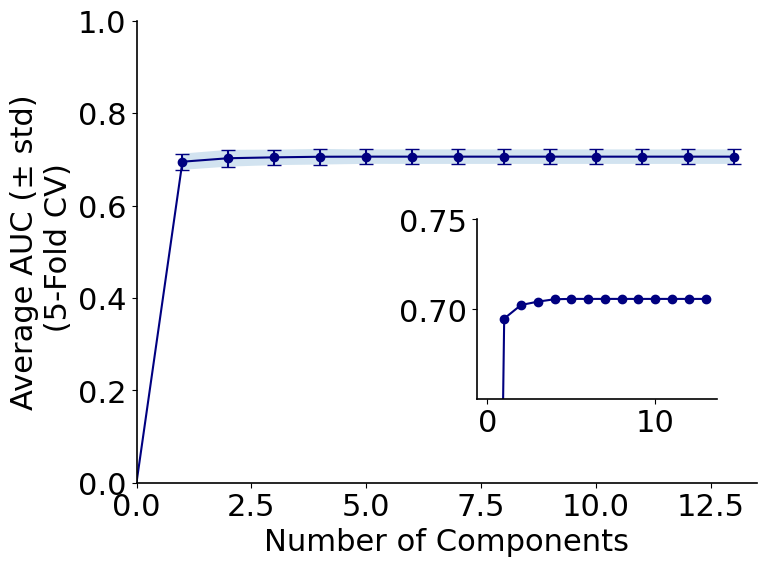

Maximum AUC at components: 5
Diminishing returns at components: 1
Maximum mean AUC: 0.706 ± 0.016
AUC at diminishing returns: 0.695 ± 0.018
Recommended number of components: 1
Optimal number of components: 1
Component 1:
Cumulative Y variance: 9.25%
Incremental Y variance: 9.25%


In [ ]:
# do PLSDA to identify the parameters that are important for the interest_class
X = renamed_df.drop(columns=['param_index','init_cond_index' ,'group' ,'interest_class'], axis=1)
y = renamed_df['interest_class']

# keep one hot encoding as False
plsda = PLSDA(n_components=None, cv_folds=5, one_hot_encode=False, downsample_ratio= 3)

# Determine the optimal number of components
optimal_components, mean_scores = plsda.find_optimal_components(X, y, max_components=13, save_plot=True)
print(f'Optimal number of components: {optimal_components}')

# Fit and transform the data using the optimal number of components
plsda.n_components = optimal_components
X_pls, x_var,y_var, y_encoded, X_downsampled, y_balanced = plsda.fit_transform(X, y)

# # Plot the scores
class_descriptions = {0: 'Fra2 low', 1: 'FRA2 high'}
plot_scores = plsda.plot_scores_with_density(X_pls, x_var,y_var, y_encoded,lv1 = 0, lv2 = 1, class_descriptions=class_descriptions,
                  alpha_values = [0.5, 0.8], line_colors = ['darkslategray', 'k'], save_plot=False, size = [100,150])

In [ ]:
# # Perform cross-validation and plot ROC curve 
# # this is for a single cross validation
# y_scores, y_encoded = plsda.cross_validation(X, y)
# #plsda.plot_roc(y_scores, y_encoded)
# plsda.plot_mean_roc(X, y, save_plot=False)

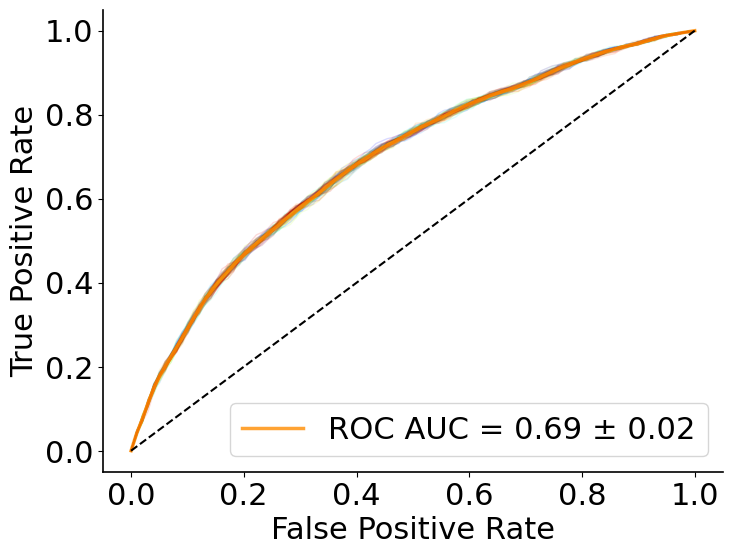

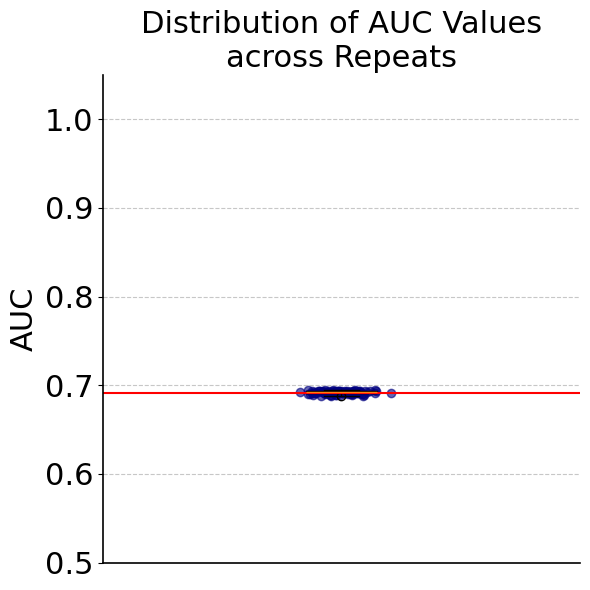

Repeated CV Results (100 repeats):
Mean AUC: 0.692 ± 0.002
Range: [0.688, 0.695]
Repeated cross-validation AUC: 0.692 ± 0.002


In [27]:
# cross validation with repeated down sampling
mean_auc, std_auc = plsda.repeated_cv_with_visualization(
    X, y, n_repeats=100, save_plot=False, show_individual_curves=True
)
print(f"Repeated cross-validation AUC: {mean_auc:.3f} ± {std_auc:.3f}")

In [ ]:
# vip_scores = plsda.compute_vip()
# signed_vip_scores, feature_names = plsda.compute_signed_vip(X,y,X.columns)
# # save figure as pdf

# plsda.plot_signed_vip(signed_vip_scores, feature_names, save_plot=False)


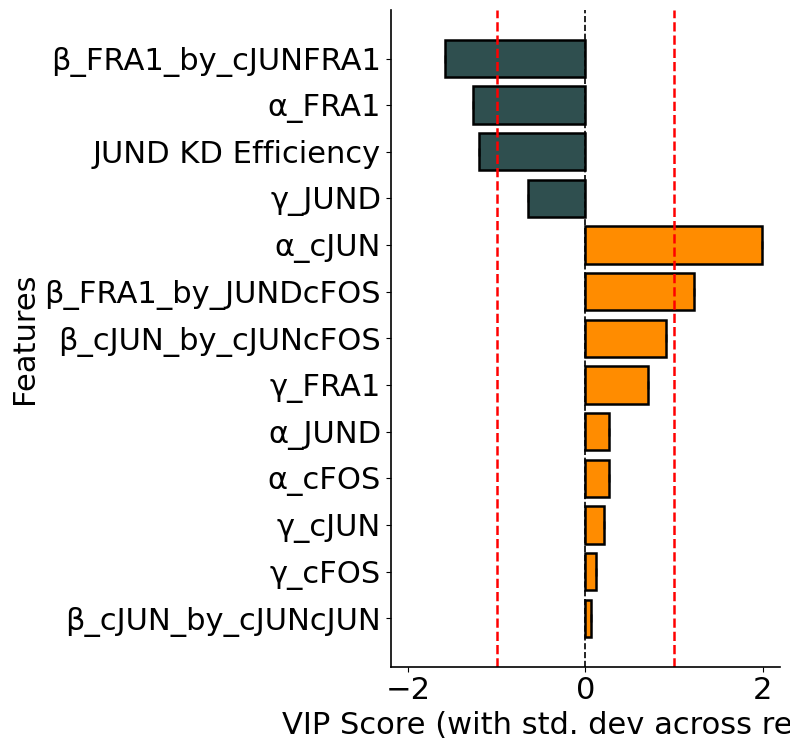

In [30]:
# VIP from repeated down sampling and cross validation
mean_vips, std_vips, feature_names = plsda.plot_repeated_vip(
    X, y, n_repeats=100, save_plot=False
)

### Extra analysis

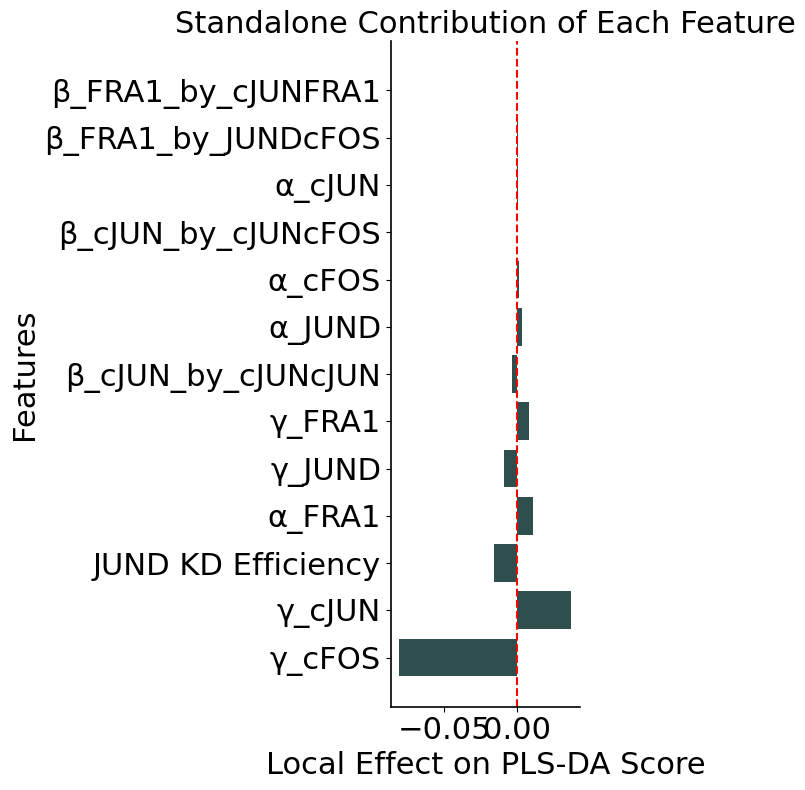

In [31]:
names = list(feature_names)
coef = plsda.pls_da.coef_.ravel()
mu = plsda.scaler.mean_
sd = plsda.scaler.scale_

# Convert coefficients back to original scale effect:
# d(score)/d(original feature) ≈ coef * (1 / (x+1)) * (1/sd)
effects = []
for i, name in enumerate(names):
    mean_x = X[name].mean()
    local_grad = coef[i] / ((mean_x + 1) * sd[i])
    effects.append((name, coef[i], local_grad))

df = pd.DataFrame(effects, columns=['Feature','Coefficient (scaled)','Effect (orig-scale)'])
df_sorted = df.sort_values('Effect (orig-scale)', key=abs, ascending=False)

plt.figure(figsize=(6,8))
plt.barh(df_sorted['Feature'], df_sorted['Effect (orig-scale)'], color='darkslategray')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Local Effect on PLS-DA Score')
plt.ylabel('Features')
plt.title('Standalone Contribution of Each Feature')
plt.tight_layout()
plt.show()

#### Prediction using the PLSDA model

In [32]:
#Get the features with highest VIP scores (e.g., top 2)
top_features = [feature_names[i] for i in np.argsort(np.abs(signed_vip_scores))[-3:]]
print(f"Analyzing impact of zeroing out features: {top_features}")


Analyzing impact of zeroing out features: ['JUND KD Efficiency', 'β_cJUN_by_cJUNcFOS', 'α_FRA1']


In [33]:
feature_names

['β_FRA1_by_cJUNFRA1',
 'α_FRA1',
 'JUND KD Efficiency',
 'γ_JUND',
 'α_cJUN',
 'β_FRA1_by_JUNDcFOS',
 'β_cJUN_by_cJUNcFOS',
 'γ_FRA1',
 'α_JUND',
 'α_cFOS',
 'γ_cJUN',
 'γ_cFOS',
 'β_cJUN_by_cJUNcJUN']


STARTING VIP IMPACT ANALYSIS

------------------------------
PREDICTION VALUES BEFORE THRESHOLDING:
------------------------------
Original predictions:
Min: -0.068
Max: 0.182
Mean: 0.054
Median: 0.054

------------------------------
ROC CURVE THRESHOLDS:
------------------------------
Min threshold: -0.068
Max threshold: inf
Optimal threshold: 0.063

------------------------------
MODIFIED DATA PREDICTIONS:
------------------------------
Min: -0.022
Max: 0.214
Mean: 0.095
Median: 0.095


/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


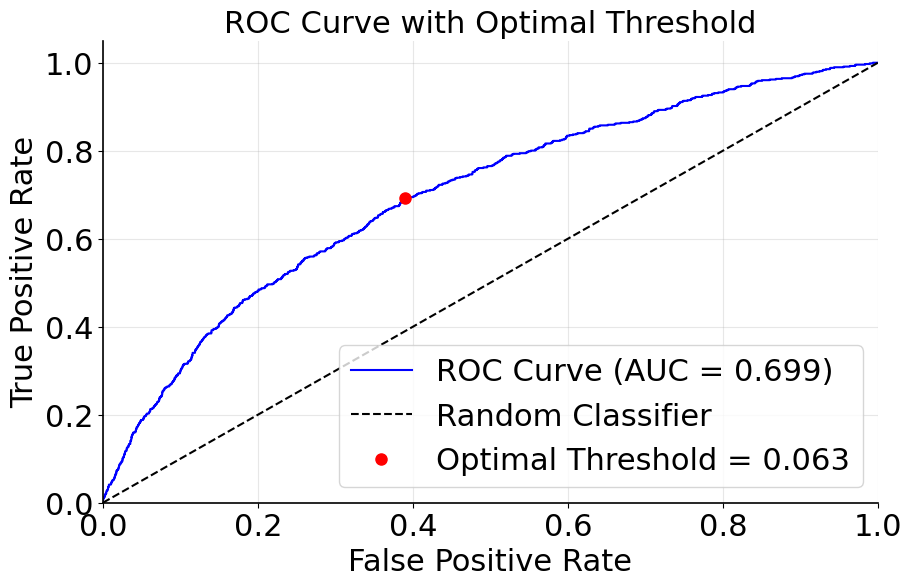

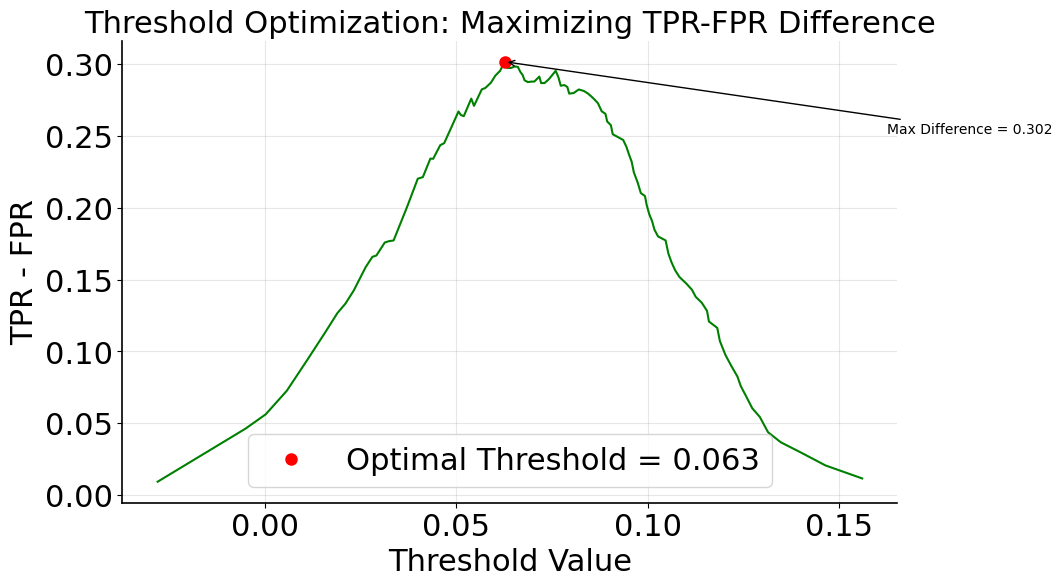

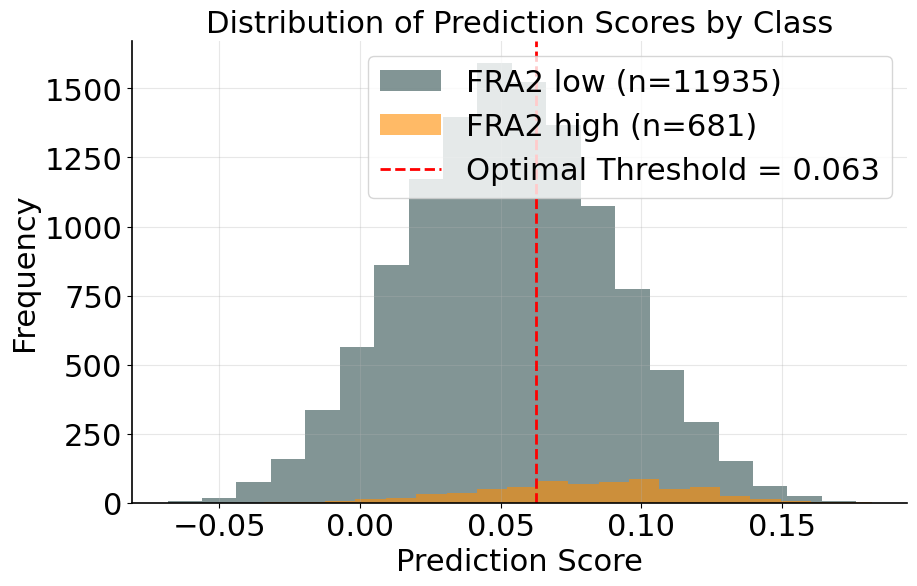


Class Distribution Summary:
True Labels:
FRA2 low: 11935 (94.6%), FRA2 high: 681 (5.4%)

Original Model Predictions:
FRA2 low: 7493 (59.4%), FRA2 high: 5123 (40.6%)

Predictions After Modifying Features:
FRA2 low: 2266 (18.0%), FRA2 high: 10350 (82.0%)

Samples that changed prediction: 5227 (41.4%)


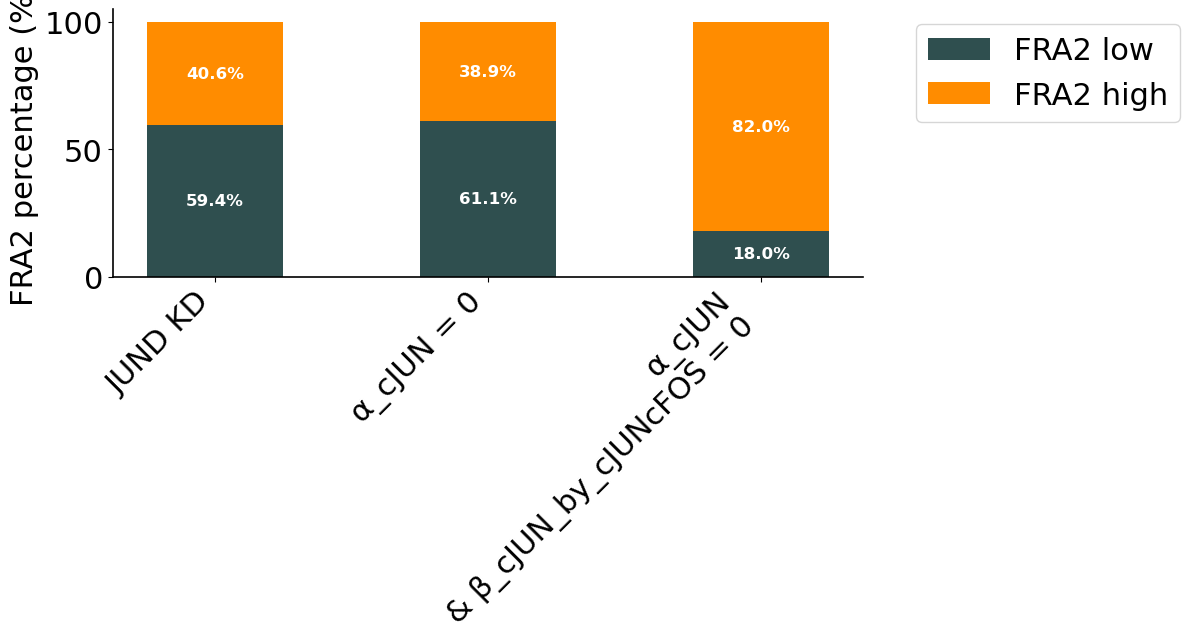

In [34]:
results_fra1 = plsda.analyze_vip_impact(
    X, y, feature_names,
    features_to_modify=['α_cJUN', 'β_cJUN_by_cJUNcFOS'],  # Same as V1
    modification_type='zero',
    plot_type='bar',
    show_plot=True
)

# Define your modification scenarios
# modification_scenarios = [
#     {
#         'features': ['α_cJUN', 'β_cJUN_by_cJUNcFOS'],
#         'type': 'zero'
#     },
#     {
#         'features': ['α_FRA1', 'β_FRA1_by_cJUNFRA1'],
#         'type': 'max'
#     }
# ]

# # Run combined analysis
# combined_results = plsda.analyze_combined_modifications(
#     X, y, feature_names, 
#     modification_scenarios,
#     show_plot=True,
#     plot_type='bar',
#     save_plot=True
# )


STARTING VIP IMPACT ANALYSIS

------------------------------
PREDICTION VALUES BEFORE THRESHOLDING:
------------------------------
Original predictions:
Min: -0.068
Max: 0.182
Mean: 0.054
Median: 0.054

------------------------------
ROC CURVE THRESHOLDS:
------------------------------
Min threshold: -0.068
Max threshold: inf
Optimal threshold: 0.063

------------------------------
MODIFIED DATA PREDICTIONS:
------------------------------
Min: 0.008
Max: 0.224
Mean: 0.117
Median: 0.117


/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ap1_proj/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


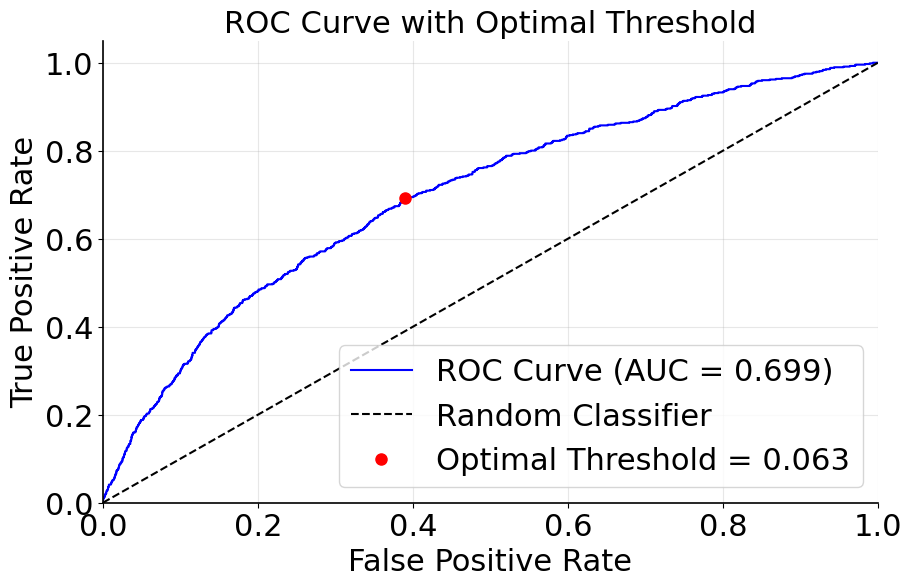

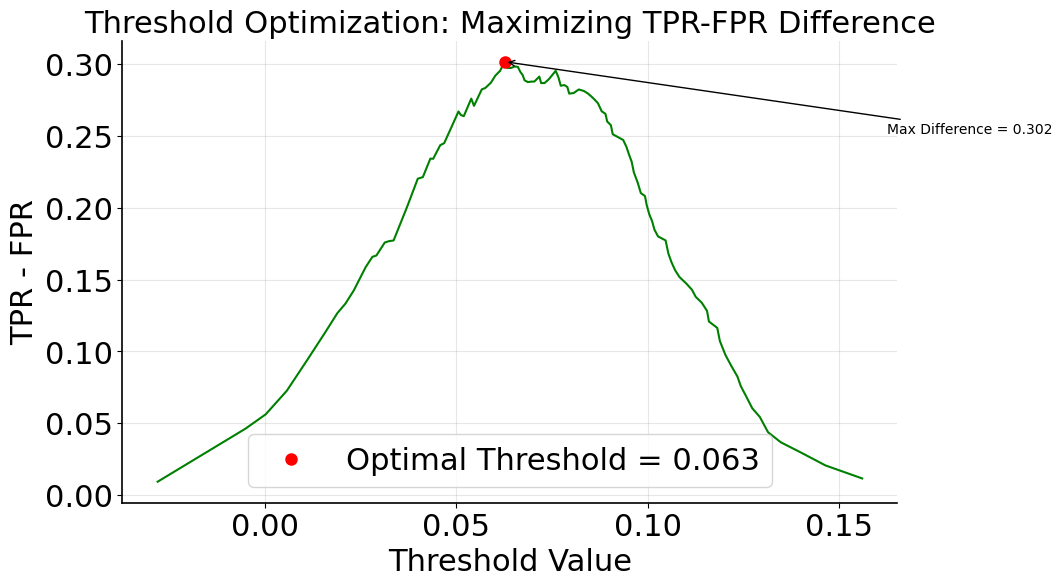

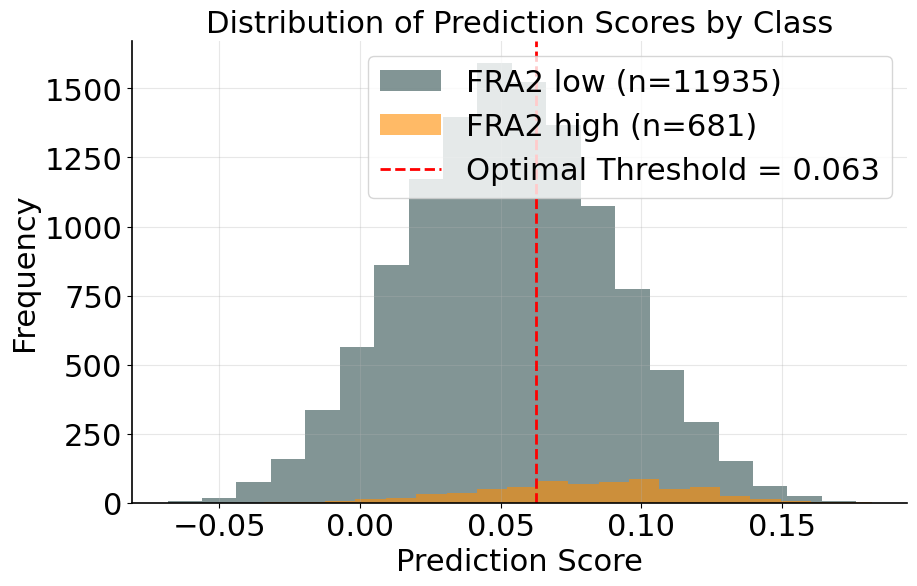


Class Distribution Summary:
True Labels:
FRA2 low: 11935 (94.6%), FRA2 high: 681 (5.4%)

Original Model Predictions:
FRA2 low: 7493 (59.4%), FRA2 high: 5123 (40.6%)

Predictions After Modifying Features:
FRA2 low: 574 (4.5%), FRA2 high: 12042 (95.5%)

Samples that changed prediction: 6919 (54.8%)


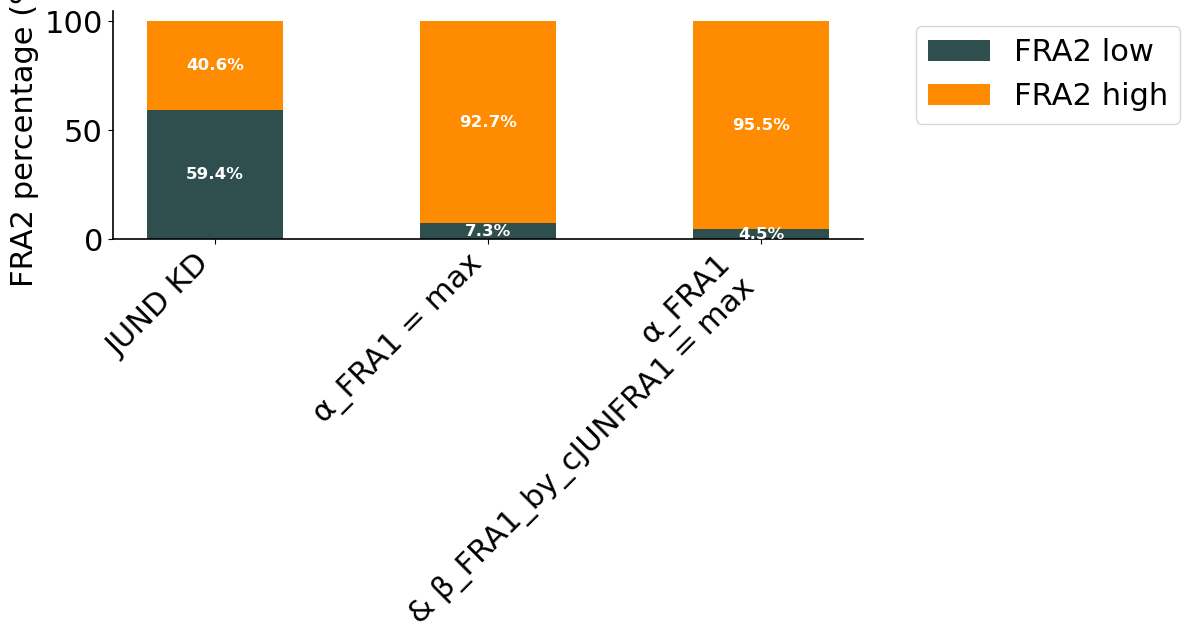

In [36]:
# Run the EXACT same individual cJUN analysis that gave you the original results
results_cjun_individual = plsda.analyze_vip_impact(
    X, y, feature_names,
    features_to_modify=['α_FRA1', 'β_FRA1_by_cJUNFRA1'],
    modification_type='max',
    plot_type='bar',
    show_plot=True,  # Let's see the plot
    save_plot=False
)